<a href="https://colab.research.google.com/github/ErikFisherGitHub/pek-eye/blob/main/P%C3%A9k%C3%A1ru_Azonos%C3%ADt%C3%B3_Rendszer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍞 Pékáru Azonosító Rendszer (Python + OpenCV)

Ez a projekt egy Python + OpenCV alapú képfeldolgozó rendszer, amely péküzem termékeit figyeli és azonosítja egy szalagon keresztül, összehasonlítva azokat referenciaképekkel.

## 🎯 Célkitűzés
- **Kenyerek és ciabatták azonosítása** referencia képek alapján
- **Tanítható modell**, új referenciaadatok könnyű hozzáadása
- **Automatikus feldolgozás**, élkiemeléssel és kontúrelemzéssel
- **Könnyű futtatás Google Colabban**

---

## 📌 Szükséges Követelmények
A rendszer Google Colabban futtatható az alábbi csomagokkal:

```python
!pip install opencv-python matplotlib
```

---

## 📂 Fájlok és Felépítés
- **`kenyer.jpg`** – referencia kép egy kenyérről
- **`ciabatta.jpg`** – referencia kép egy ciabattáról
- **`tesztkenyer.jpg`** – a tesztelendő termék képe

**Megjegyzés:** Ha új termékeket szeretnél hozzáadni, csak egy új referencia képet kell feltöltened a megfelelő névvel.

---

## 📸 Használati Útmutató

### 1️⃣ **Képek Feltöltése**
Töltsd fel a referencia és tesztképeket a Colab fájlkezelőjébe:

```python
from google.colab import files
uploaded = files.upload()
```


### 2️⃣ **Kód Futtatása**
Másold be, és/vagy futtasd az alábbi kódot a Google Colabban.

---

## 🛠️ Kód Működése
1. **Betölti a képeket** (kenyér és ciabatta referencia képek, valamint a vizsgált pékáru képe)
2. **Előfeldolgozást végez** (szürkeskála, élszűrés, kontúrelemzés)
3. **Feature Matching ORB algoritmussal** (pontokat keres és összehasonlítja a képeket)
4. **Kiválasztja a leginkább hasonló referenciaképet**

---

## 🔄 Új Termék Hozzáadása
Ha új pékárut szeretnél hozzáadni:
1. Adj hozzá egy új képet (pl. `bagett.jpg`)
2. Frissítsd a `reference_images` listát:

```python
reference_images = {
    "kenyér": load_image("kenyer.jpg"),
    "ciabatta": load_image("ciabatta.jpg"),
    "bagett": load_image("bagett.jpg")
}
```

---

## 🎉 Kimenet Példa
A kód sikeres futtatása után ezt láthatod:
```
Az azonosított pékáru: kenyér
```
És megjelenik a vizsgált termék képe.

---

## 📌 Lehetséges Fejlesztések
- **Gépi tanulás hozzáadása** CNN vagy mélytanulás alapú azonosításhoz
- **Több kép összehasonlítása egyszerre**
- **Valós idejű videófeldolgozás támogatása**

🚀 **Jó kísérletezést!** 🍞

Az azonosított pékáru: kenyér


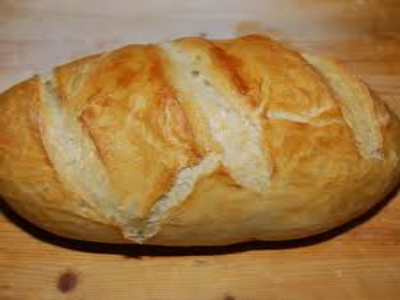

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 1. Kép betöltése (Google Colabon belül feltöltés szükséges)
def load_image(path):
    image = cv2.imread(path)
    if image is None:
        print(f"Hiba: Nem található a kép {path}")
        return None
    return cv2.resize(image, (400, 300))  # Méretezés a könnyebb feldolgozás érdekében

# 2. Kép előfeldolgozása (Szürkeskála, Gauss-elmosás, Élszűrés)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

# 3. Kontúrok keresése és kiemelése
def detect_contours(image):
    edges = preprocess_image(image)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

    return output, contours

# 4. Kép összehasonlítása referencia képekkel (ORB Feature Matching)
def compare_images(image1, image2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # A legjobb egyezések keresése
    matches = sorted(matches, key=lambda x: x.distance)

    return len(matches)

# 5. Kenyér azonosítása egy referenciaadatbázis alapján
def identify_bread(test_image, reference_images):
    max_matches = 0
    best_match = "Ismeretlen"

    for ref_name, ref_image in reference_images.items():
        match_score = compare_images(test_image, ref_image)
        if match_score > max_matches:
            max_matches = match_score
            best_match = ref_name

    return best_match

# Teszteléshez: referencia képek betöltése
reference_images = {
    "kenyér": load_image("kenyer.jpg"),
    "ciabatta": load_image("ciabatta.jpg")
}

# Vizsgálandó kép betöltése
test_image = load_image("tesztkenyer.jpg")

# Azonosítás
if test_image is not None:
    result = identify_bread(test_image, reference_images)
    print(f"Az azonosított pékáru: {result}")
    cv2_imshow(test_image)
